# 케라스로 만드는 얕은 신경망

얕은 신경망을 만들어 MNIST 숫자를 분류합니다.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rickiepark/dl-illustrated/blob/master/notebooks/5-1.shallow_net_in_keras.ipynb)

#### 라이브러리 적재

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### 데이터 적재

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

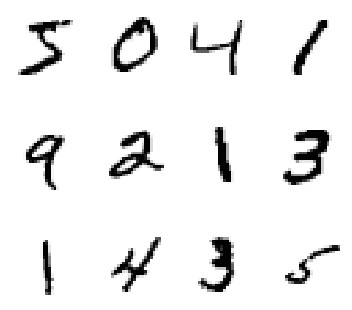

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

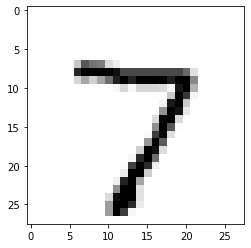

In [9]:
plt.imshow(X_valid[0], cmap='Greys')
plt.show()

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### 신경망 구조 설계

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### 모델 컴파일

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### 훈련!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0931 - accuracy: 0.1025 - val_loss: 0.0924 - val_accuracy: 0.1058
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.1205 - val_loss: 0.0916 - val_accuracy: 0.1263
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.1390 - val_loss: 0.0910 - val_accuracy: 0.1439
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.1531 - val_loss: 0.0905 - val_accuracy: 0.1608
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.1729 - val_loss: 0.0901 - val_accuracy: 0.1901
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.2088 - val_loss: 0.0897 - val_accuracy: 0.2289
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.2456 - val_loss: 0.0893 - val_accuracy: 0.2623

Epoch 58/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.5689 - val_loss: 0.0675 - val_accuracy: 0.5778
Epoch 59/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.5728 - val_loss: 0.0670 - val_accuracy: 0.5815
Epoch 60/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.5762 - val_loss: 0.0665 - val_accuracy: 0.5856
Epoch 61/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.5794 - val_loss: 0.0660 - val_accuracy: 0.5897
Epoch 62/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.5827 - val_loss: 0.0655 - val_accuracy: 0.5932
Epoch 63/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.5864 - val_loss: 0.0651 - val_accuracy: 0.5972
Epoch 64/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.5896 - val_loss: 0.0646 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.7695 - val_loss: 0.0430 - val_accuracy: 0.7821
Epoch 116/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.7711 - val_loss: 0.0426 - val_accuracy: 0.7841
Epoch 117/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.7727 - val_loss: 0.0423 - val_accuracy: 0.7856
Epoch 118/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.7746 - val_loss: 0.0420 - val_accuracy: 0.7871
Epoch 119/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0427 - accuracy: 0.7766 - val_loss: 0.0417 - val_accuracy: 0.7900
Epoch 120/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0424 - accuracy: 0.7784 - val_loss: 0.0414 - val_accuracy: 0.7921
Epoch 121/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0421 - accuracy: 0.7808 - val_loss: 0.0411 - val_ac

In [24]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.8714


[0.026233600452542305, 0.871399998664856]